In [1]:
#If you run this yourself, make sure all libraries are installed and the csv file is in the same folder as the notebook
#import libraries
import numpy as np
import pandas as pd
import matplotlib as mlp
from matplotlib import pyplot as plt
mlp.rcParams['figure.dpi'] = 300
import scipy.stats
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

In [2]:
#import human graded data as pandas df
HG_EM = pd.read_csv("EM.csv") 
HG_QM = pd.read_csv("QM.csv") 
HG_CM = pd.read_csv("CM.csv") 
#import no markscheme data as pandas df
NMS_EM = pd.read_csv("GPT_EM_NMS.csv") 
NMS_QM = pd.read_csv("GPT_QM_NMS.csv")
NMS_CM = pd.read_csv("GPT_CM_NMS.csv")
#import markscheme data as pandas df
MS_EM = pd.read_csv("GPT_EM_MS.csv") 
MS_QM = pd.read_csv("GPT_QM_MS.csv")
MS_CM = pd.read_csv("GPT_CM_MS.csv")


In [3]:
#Examine the human graded data
HG_EM

,Question,Total Marks,M1_Solution 1:,M1_Solution 2:,M1_Solution 3:,M2_Solution 1,M2_Solution 2:,M2_Solution 3:
0,1,8,6,8,5,7,8,7
1,2,5,4,5,5,4,4,4
2,3,14,6,4,4,5,4,5
3,4,11,10,5,9,9,6,9
4,5,11,1,1,1,1,1,1
5,6,5,4,5,4,4,4,4
6,7,6,4,4,4,6,6,4
7,8,6,6,2,4,6,1,4
8,9,15,11,8,8,13,11,11
9,10,7,1,4,3,2,3,3


This seems alright, so we'll leave it as is for now. We don't need to make the initial changes as pandas does that for us. The code should work in either case. Now we need to average the solution grades. 

In [4]:
from data_preprocess import process
HG = process(HG_EM, HG_CM, HG_QM)
HG_EM = HG[0]
HG_CM = HG[1]
HG_QM = HG[2]

In [5]:
HG_EM

,Questions,Total Marks,Marks,Norm,Norm Std
0,1,8,6.5,0.812500,0.062500
1,2,5,4.0,0.800000,0.000000
2,3,14,5.5,0.392857,0.035714
3,4,11,9.5,0.863636,0.045455
4,5,11,1.0,0.090909,0.000000
5,6,5,4.0,0.800000,0.000000
6,7,6,5.0,0.833333,0.166667
7,8,6,6.0,1.000000,0.000000
8,9,15,12.0,0.800000,0.066667
9,10,7,1.5,0.214286,0.071429


In [6]:
#Examine the self graded data
NMS_EM

,Question,Total Marks,Unnamed: 2,Solution 1:,Solution 2:,Solution 3:,Unnamed: 6,Solution 1:.1,Solution 2:.1,Solution 3:.1,...,Solution 2:.2,Solution 3:.2,Unnamed: 14,Solution 1:.3,Solution 2:.3,Solution 3:.3,Unnamed: 18,Solution 1:.4,Solution 2:.4,Solution 3:.4
0,1,8,NaN,8,7,6,NaN,8,7,7,...,7,6,NaN,8,7,6,NaN,8,7,6
1,2,5,NaN,5,4,4,NaN,5,4,4,...,4,4,NaN,5,4,4,NaN,5,4,4
2,3,14,NaN,11,12,12,NaN,10,11,12,...,10,11,NaN,9,11,12,NaN,10,12,11
3,4,11,NaN,10,7,11,NaN,10,6,11,...,7,8,NaN,9,4,11,NaN,11,6,11
4,5,11,NaN,5,8,7,NaN,4,7,5,...,7,5,NaN,4,11,4,NaN,6,11,5
5,6,5,NaN,5,5,5,NaN,5,5,5,...,5,5,NaN,5,5,5,NaN,5,5,5
6,7,6,NaN,5,6,5,NaN,6,5,5,...,5,6,NaN,5,5,5,NaN,5,6,5
7,8,6,NaN,6,3,5,NaN,5,3,4,...,3,5,NaN,5,3,5,NaN,5,3,6
8,9,15,NaN,15,15,15,NaN,14,13,14,...,13,13,NaN,14,14,12,NaN,14,13,11
9,10,7,NaN,7,7,7,NaN,5,7,7,...,5,7,NaN,4,5,5,NaN,3,5,7


Couple things need to be changed. Index vs Question is fine. We need to removed all unnamed 

In [7]:
from data_preprocess import que_process
SG = que_process(NMS_EM, NMS_CM, NMS_QM, MS_EM, MS_CM, MS_QM)

In [8]:
#Assigning names
NMS_EM = SG[0]
NMS_CM = SG[1]
NMS_QM = SG[2]
MS_EM = SG[3]
MS_CM = SG[4]
MS_QM = SG[5] 

In [9]:
NMS_EM

,Questions,Total Marks,Marks,Norm,Norm Std
0,1,8,8.0,1.000000,0.000000
1,2,5,5.0,1.000000,0.000000
2,3,14,10.0,0.714286,0.022588
3,4,11,10.0,0.909091,0.028748
4,5,11,4.6,0.418182,0.036364
5,6,5,5.0,1.000000,0.000000
6,7,6,5.0,0.833333,0.052705
7,8,6,5.4,0.900000,0.040825
8,9,15,14.4,0.960000,0.016330
9,10,7,4.6,0.657143,0.096890


# Regression Markscheme vs No Markscheme

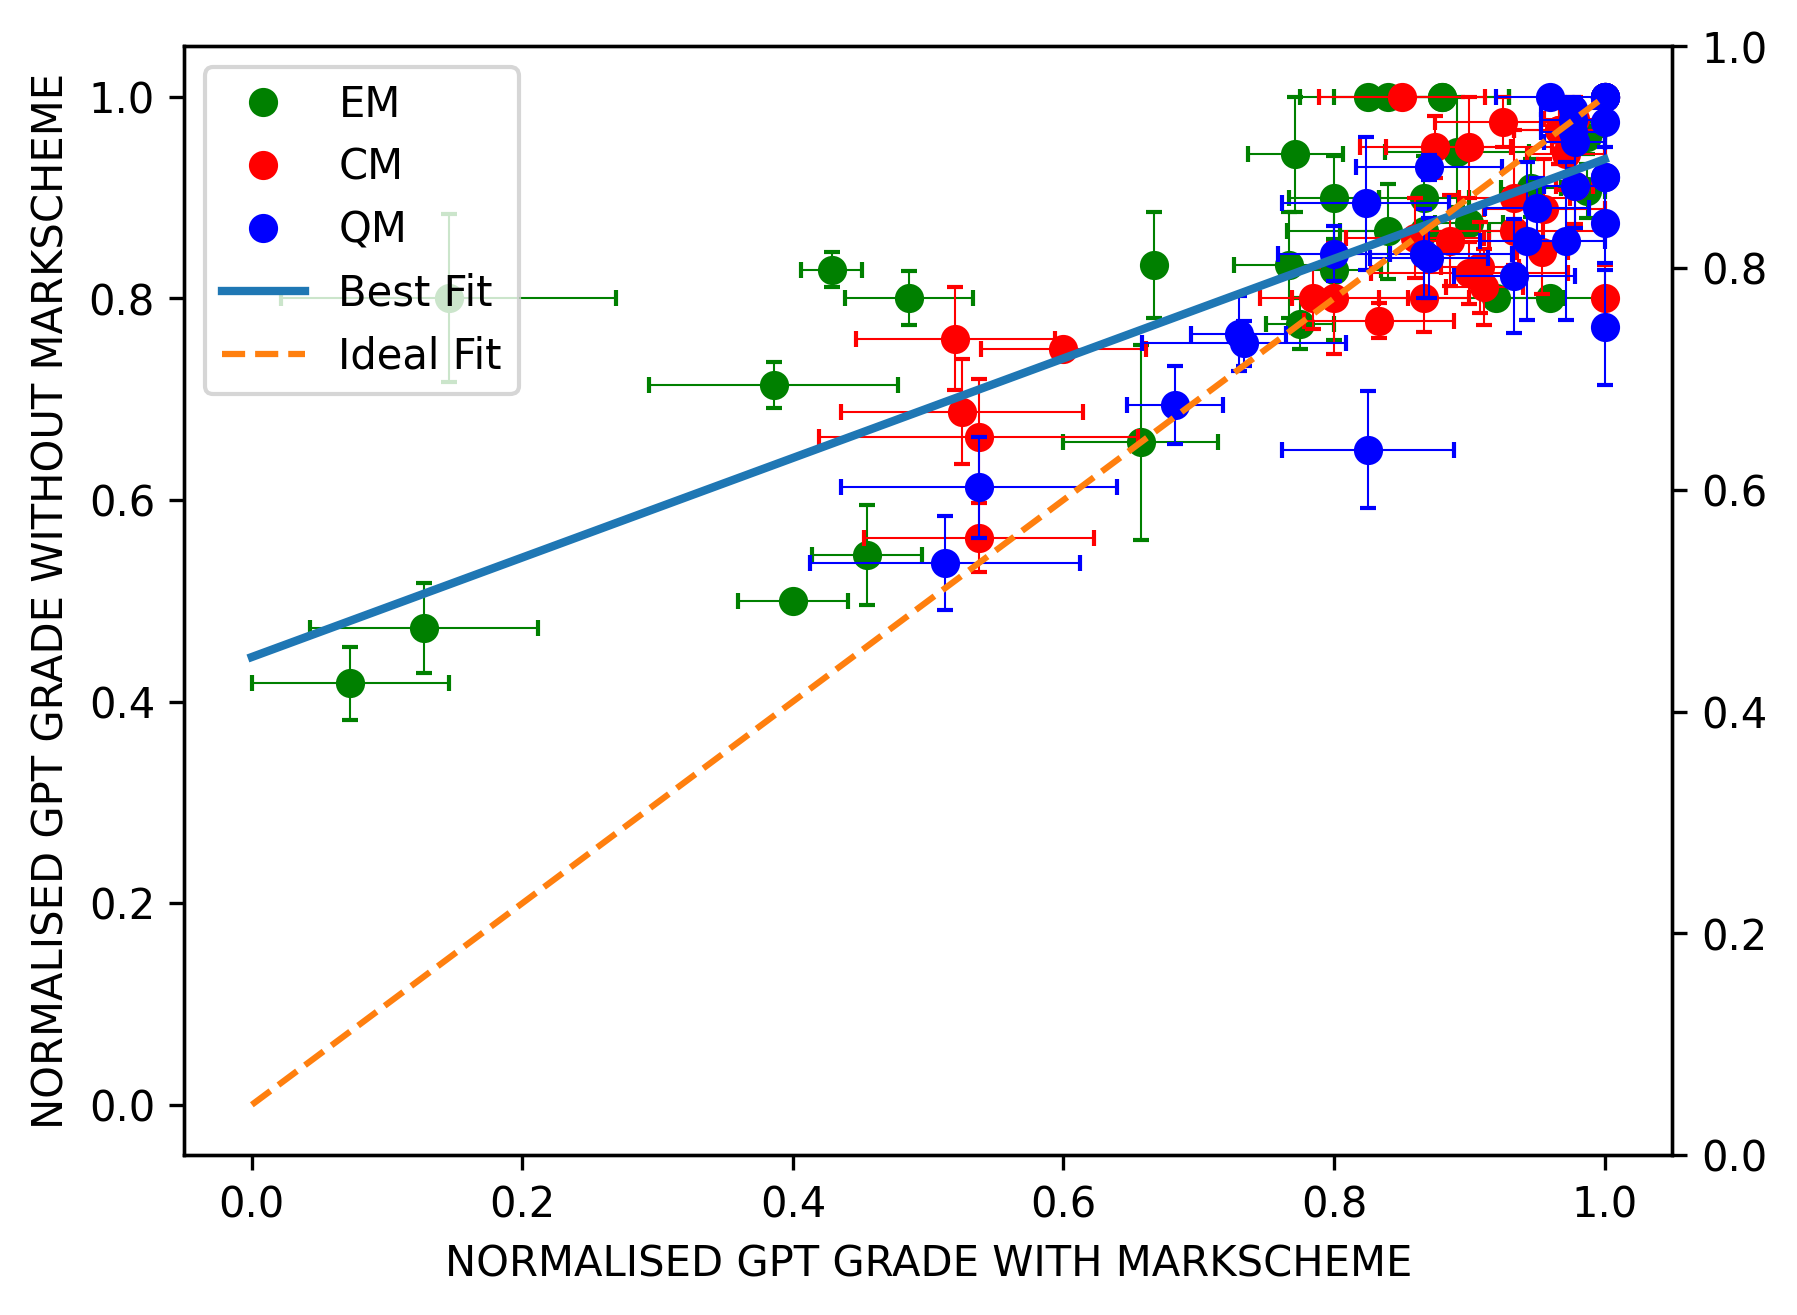

In [10]:
MS = [MS_EM, MS_CM, MS_QM]
NMS = [NMS_EM, NMS_CM, NMS_QM]
colr = ['green', 'red', 'blue']
names = ['EM', 'CM', 'QM']

# Concatenate data for trend line calculation
concat_MS = pd.concat(MS, ignore_index=True, axis=0)
concat_NMS = pd.concat(NMS, ignore_index=True, axis=0)

# Create the figure and the first axis
fig, ax1 = plt.subplots()

# Plot the different points on the first axis
for i, (dfi, dfj) in enumerate(zip(MS, NMS)):
    # Plot data and set labels
    ax1.plot(dfi['Norm'], dfj['Norm'], 'o', color=colr[i], label=names[i])
    ax1.errorbar(dfi['Norm'], dfj['Norm'], xerr=dfi['Norm Std'], yerr=dfj['Norm Std'], ls='none', elinewidth=0.5, capsize=2, color=colr[i])

# Labels for the first y-axis
ax1.set_xlabel('NORMALISED GPT GRADE WITH MARKSCHEME')
ax1.set_ylabel('NORMALISED GPT GRADE WITHOUT MARKSCHEME')

# Fit the trend line for the first axis
z = np.polyfit(concat_MS['Norm'], concat_NMS['Norm'], 1)
p = np.poly1d(z)
ax1.plot(np.linspace(0, 1, 2), p(np.linspace(0, 1, 2)), "-", linewidth=2, label="Best Fit")

# Ideal Fit line
ax1.plot(np.linspace(0, 1, 2), np.linspace(0, 1, 2), '--', label="Ideal Fit")

# Create a second y-axis on the right side
ax2 = ax1.twinx()

# Show the plot with the added right-side y-axis
ax1.legend(loc='upper left')
plt.savefig("GPT_MvNM.png")
plt.show()

In [11]:
scipy.stats.pearsonr(concat_MS['Norm'], concat_NMS['Norm']) #(pearson coefficient, p-value)

PearsonRResult(statistic=0.778990007039076, pvalue=1.5689822115460947e-19)

# Regression Markscheme vs Human Graded

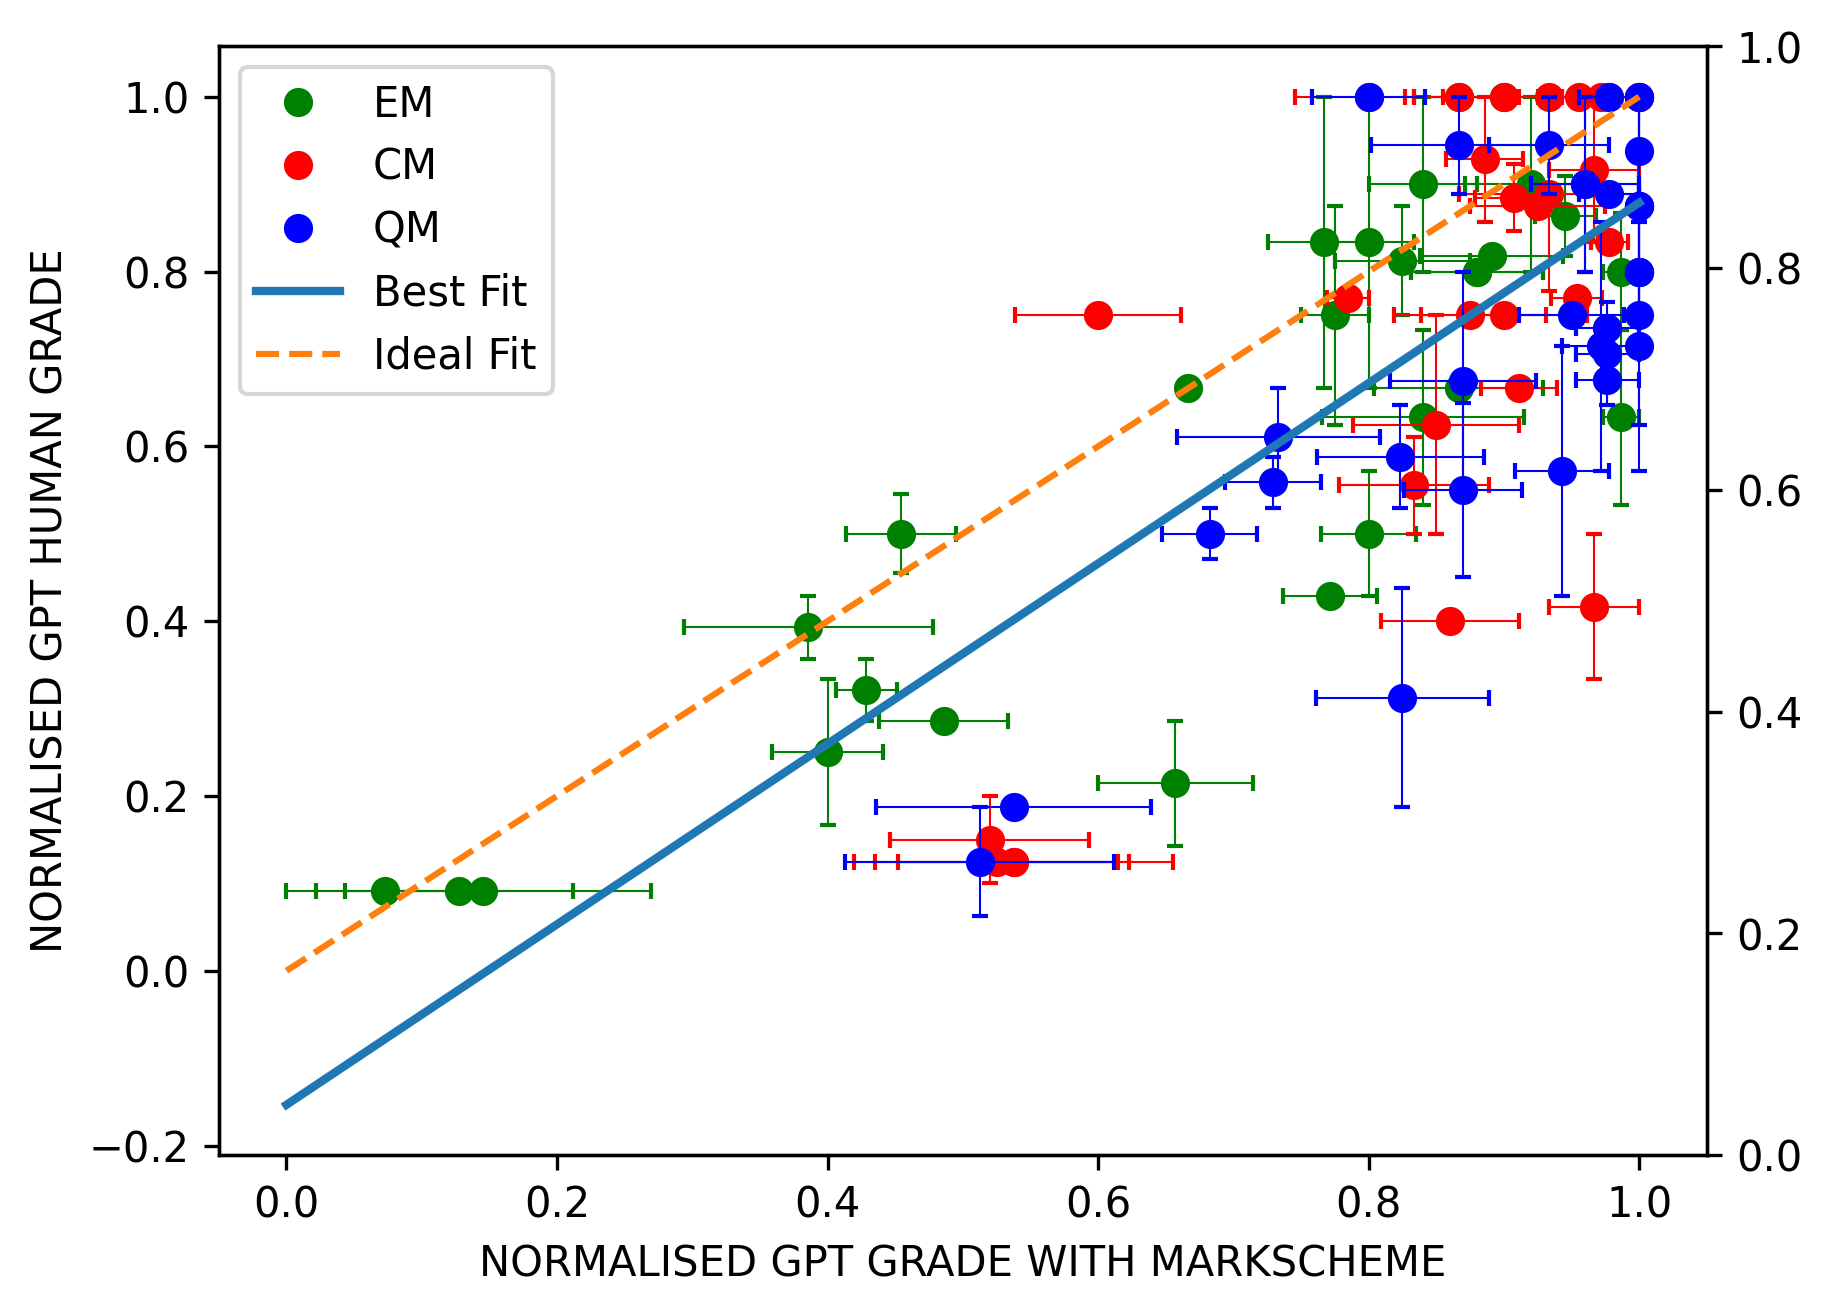

In [12]:
MS = [MS_EM, MS_CM, MS_QM]
HG = [HG_EM, HG_CM, HG_QM]
colr = ['green', 'red', 'blue']
names = ['EM', 'CM', 'QM']


# Concatenate data for trend line calculation
concat_MS = pd.concat(MS, ignore_index=True, axis=0)
concat_HG = pd.concat(HG, ignore_index=True, axis=0)

# Plot the different points
fig, ax1 = plt.subplots()
for i, (dfi, dfj) in enumerate(zip(MS, HG)):
    # Plot data and set labels
    ax1.plot(dfi['Norm'], dfj['Norm'], 'o', color=colr[i], label=names[i])
    ax1.errorbar(dfi['Norm'], dfj['Norm'], xerr=dfi['Norm Std'], yerr=dfj['Norm Std'], ls='none', elinewidth=0.5, capsize=2, color=colr[i])

# Labels for the first y-axis
ax1.set_xlabel('NORMALISED GPT GRADE WITH MARKSCHEME')
ax1.set_ylabel('NORMALISED GPT HUMAN GRADE')

# Fit the trend line
z = np.polyfit(concat_MS['Norm'], concat_HG['Norm'], 1)
p = np.poly1d(z)
ax1.plot(np.linspace(0, 1, 2), p(np.linspace(0, 1, 2)), "-", linewidth=2, label="Best Fit")

# Ideal Fit line
ax1.plot(np.linspace(0, 1, 2), np.linspace(0, 1, 2), '--', label="Ideal Fit")

# Create a second y-axis on the right side
ax2 = ax1.twinx()

# Show the plot with legend
ax1.legend(loc='upper left')
plt.savefig("GPT_MvHG.png")
plt.show()

In [13]:
scipy.stats.pearsonr(concat_MS['Norm'], concat_HG['Norm']) #(pearson coefficient, p-value)

PearsonRResult(statistic=0.7888232163458444, pvalue=2.6668619764301002e-20)

# Regression No Markscheme vs Human Graded

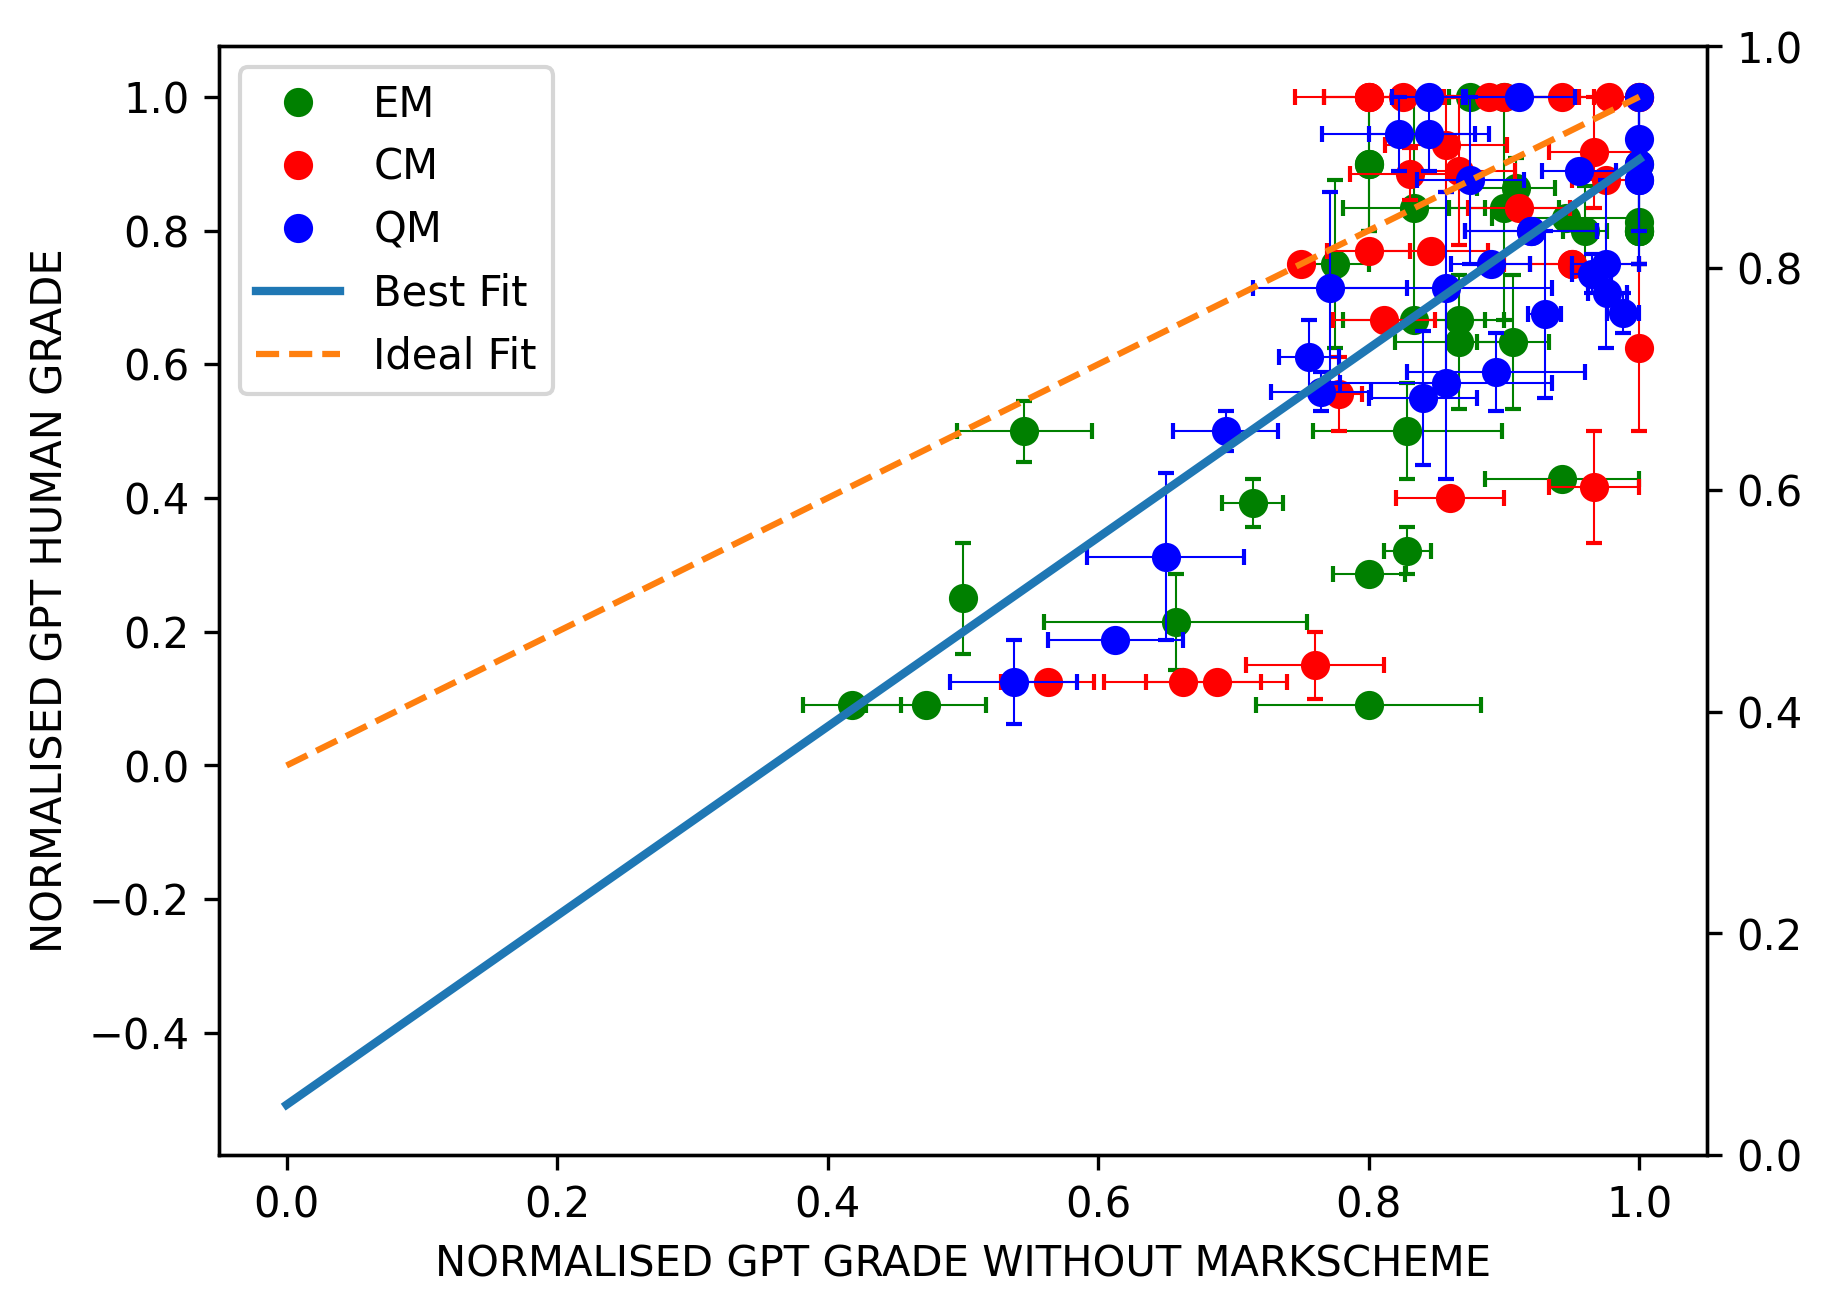

In [14]:
NMS = [NMS_EM, NMS_CM, NMS_QM]
HG = [HG_EM, HG_CM, HG_QM]
colr = ['green', 'red', 'blue']
names = ['EM', 'CM', 'QM']


# Concatenate data for trend line calculation
concat_NMS = pd.concat(NMS, ignore_index=True, axis=0)
concat_HG = pd.concat(HG, ignore_index=True, axis=0)

# Create the figure and the first axis
fig, ax1 = plt.subplots()

# Plot the different points on the first axis
for i, (dfi, dfj) in enumerate(zip(NMS, HG)):
    # Plot data and set labels
    ax1.plot(dfi['Norm'], dfj['Norm'], 'o', color=colr[i], label=names[i])
    ax1.errorbar(dfi['Norm'], dfj['Norm'], xerr=dfi['Norm Std'], yerr=dfj['Norm Std'], ls='none', elinewidth=0.5, capsize=2, color=colr[i])

# Labels for the first y-axis
ax1.set_xlabel('NORMALISED GPT GRADE WITHOUT MARKSCHEME')
ax1.set_ylabel('NORMALISED GPT HUMAN GRADE')

# Fit the trend line for the first axis
z = np.polyfit(concat_NMS['Norm'], concat_HG['Norm'], 1)
p = np.poly1d(z)
ax1.plot(np.linspace(0, 1, 2), p(np.linspace(0, 1, 2)), "-", linewidth=2, label="Best Fit")

# Ideal Fit line
ax1.plot(np.linspace(0, 1, 2), np.linspace(0, 1, 2), '--', label="Ideal Fit")

# Create a second y-axis on the right side
ax2 = ax1.twinx()

# Show the plot with the added right-side y-axis
ax1.legend(loc='upper left')
plt.savefig("GPT_NMvHG.png")
plt.show()

In [15]:
scipy.stats.pearsonr(concat_NMS['Norm'], concat_HG['Norm']) #(pearson coefficient, p-value)

PearsonRResult(statistic=0.6850213267668979, pvalue=9.60437646655625e-14)

# Clustering Markscheme vs No Markscheme

In [16]:
clust_data_1 = list(zip(concat_MS['Norm'], concat_NMS['Norm']))

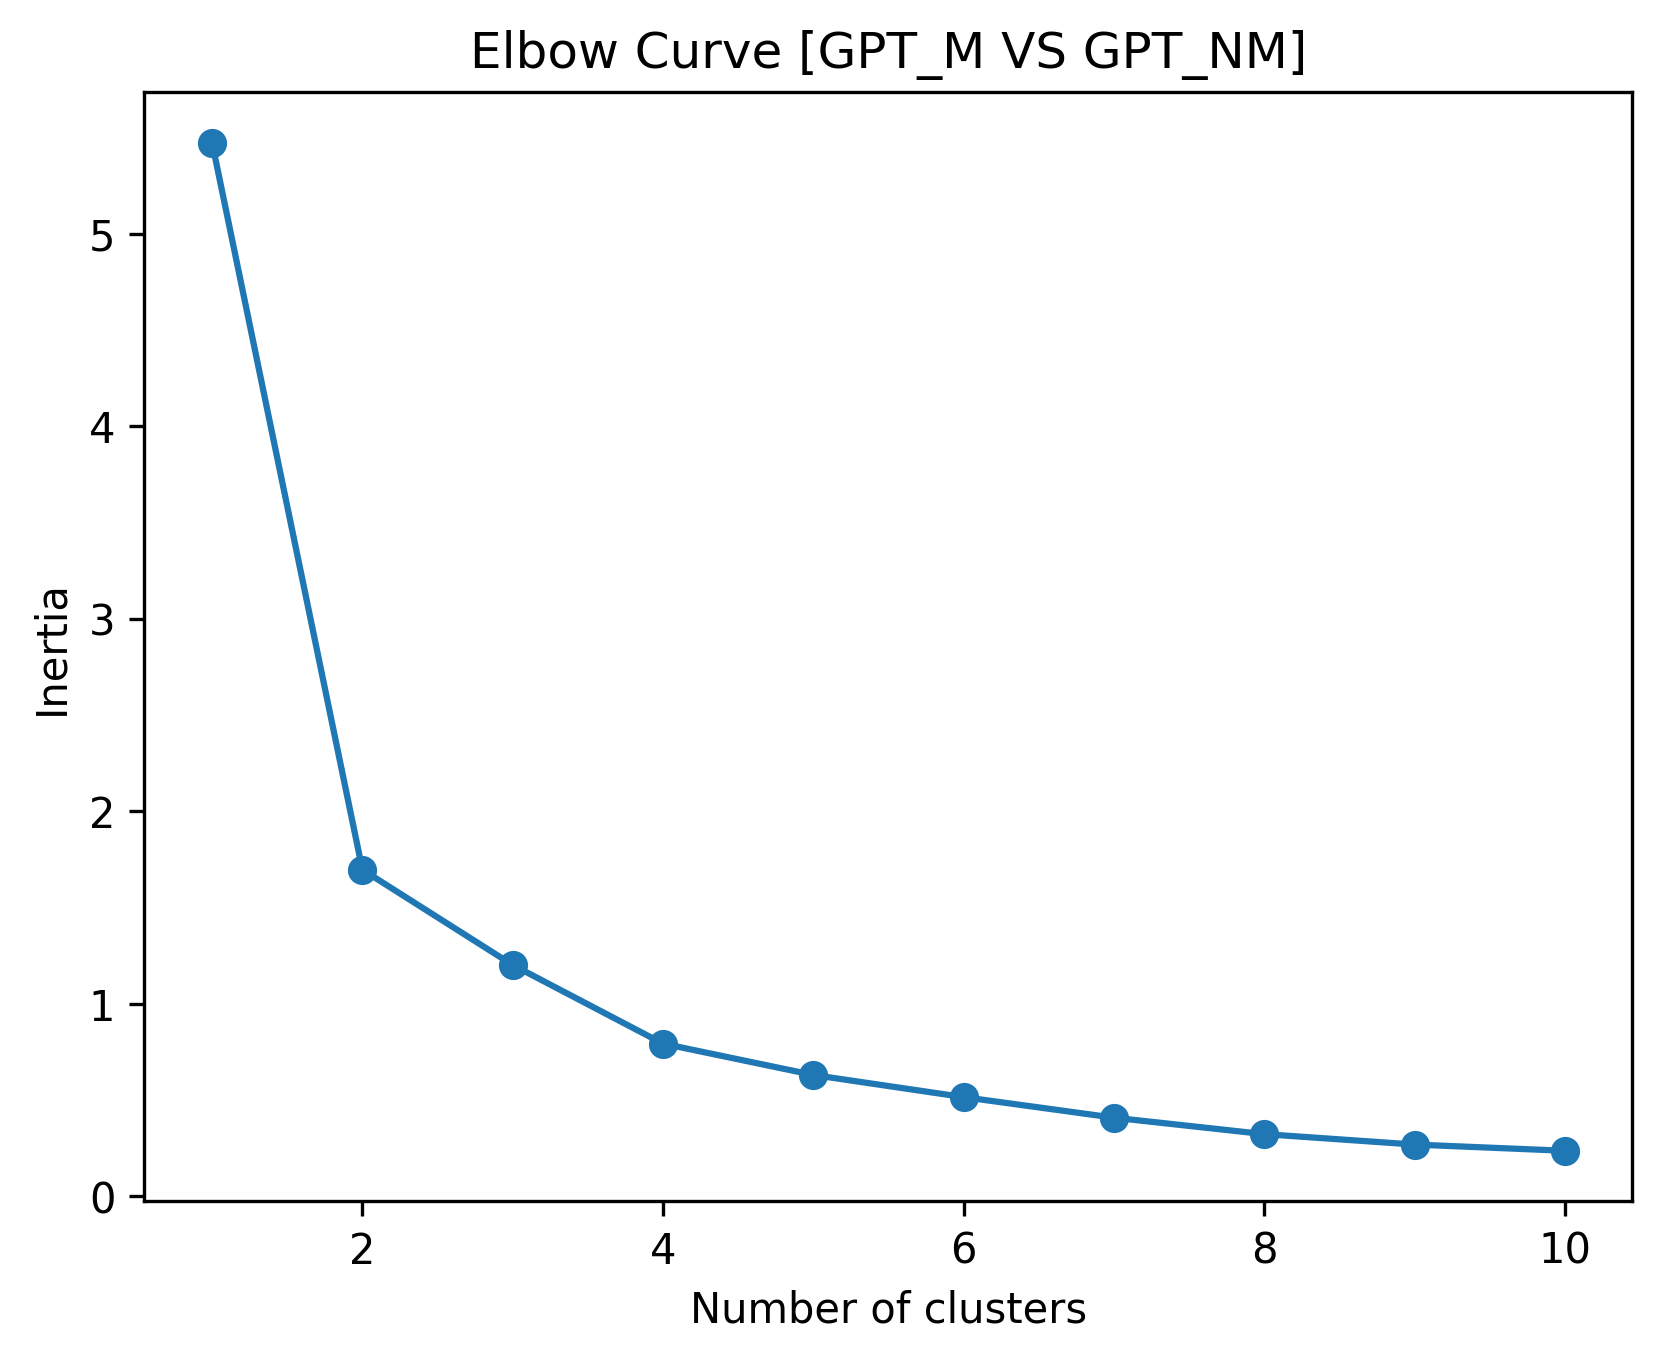

In [17]:
#Array for variation within each cluster
inertias = []

#We will calculate the variation for 10 clusters
for i in range(1,11): 
    kmeans = KMeans(n_clusters=i, n_init = 10)
    kmeans.fit(clust_data_1)
    inertias.append(kmeans.inertia_)

#plotting elbow curve    
plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow Curve [GPT_M VS GPT_NM]')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

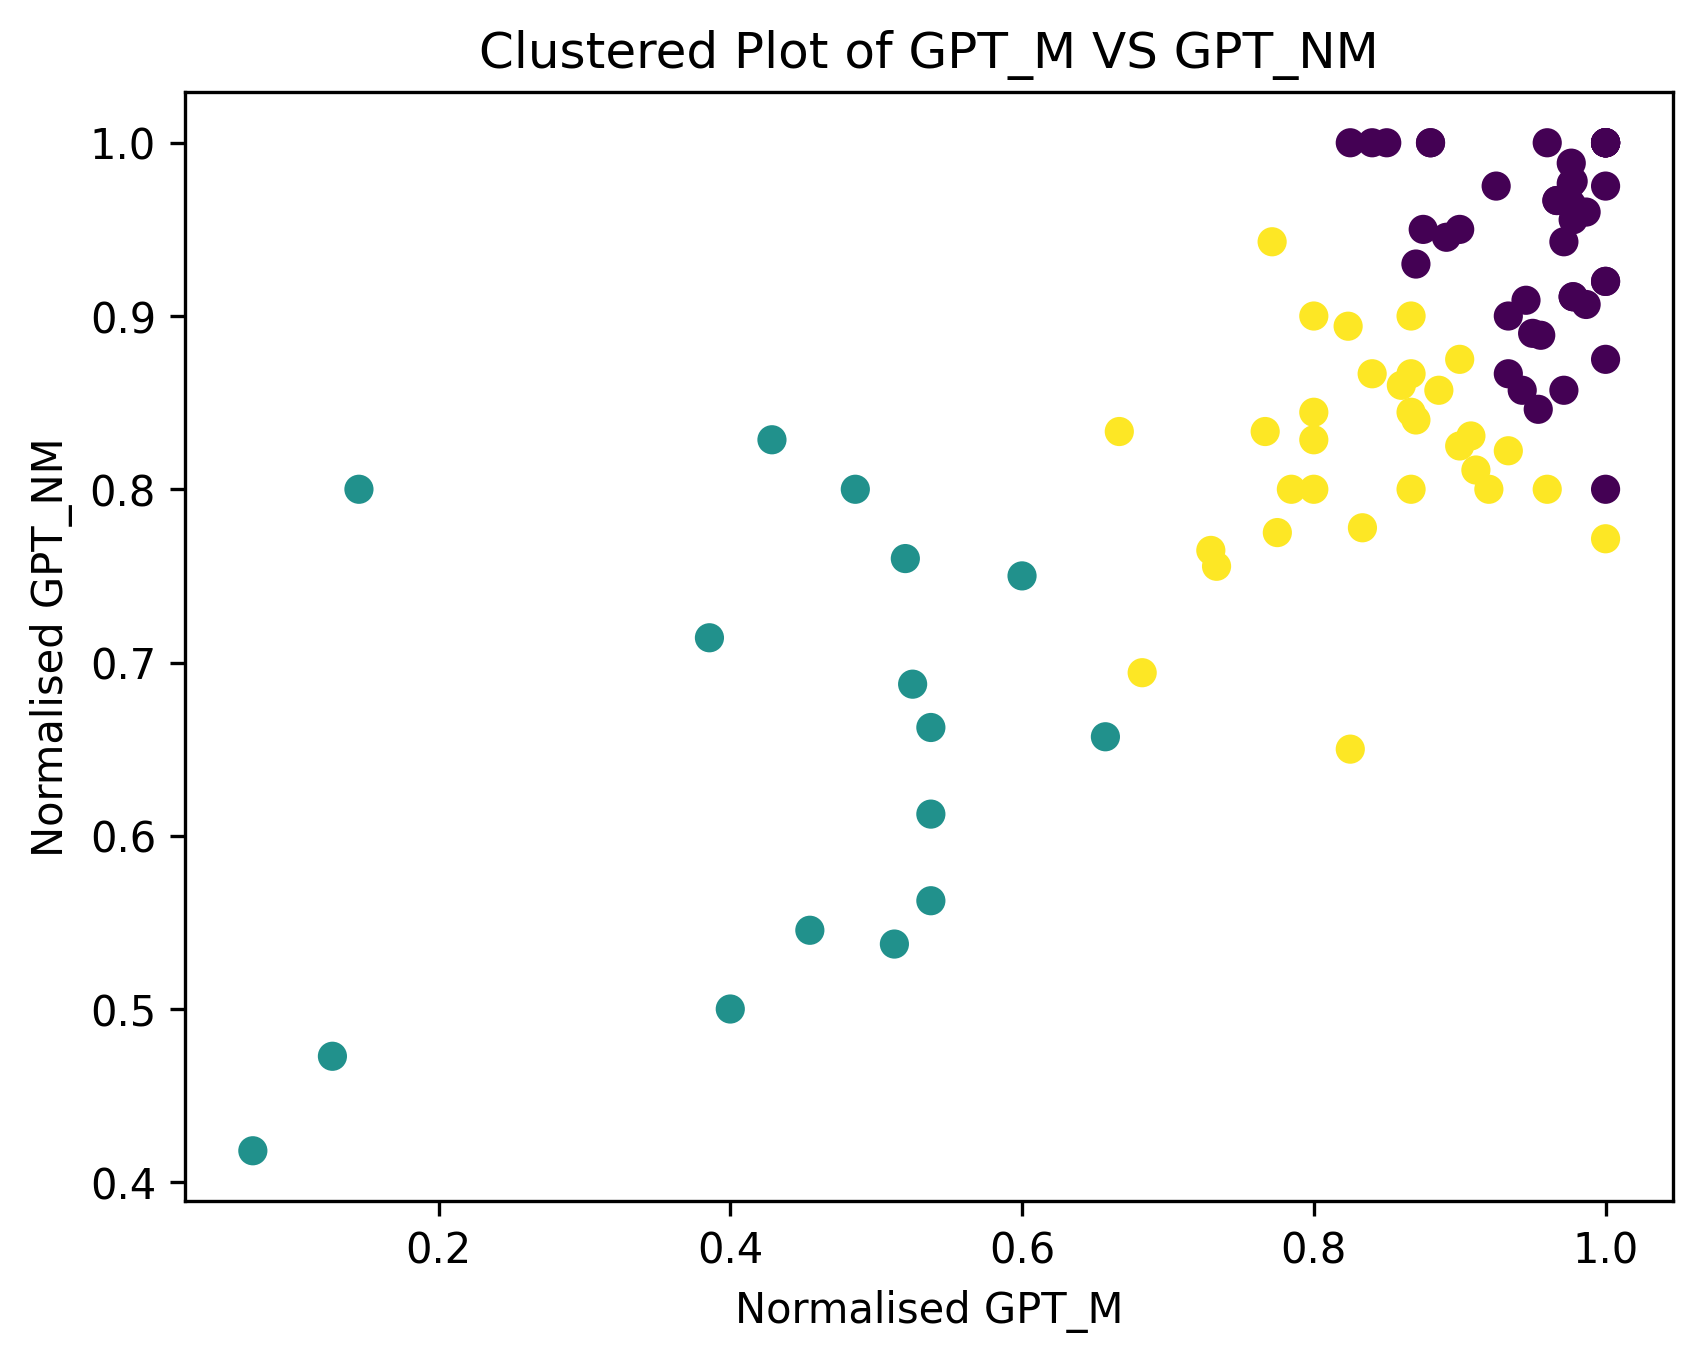

In [18]:
#Creating the classified data. Play around with n_clusters if you would like to see how data is classfied differently.
kmeans = KMeans(n_clusters=3, n_init = 10)
kmeans.fit(clust_data_1)

#Plotting classified data
plt.scatter(concat_MS['Norm'], concat_NMS['Norm'], c=kmeans.labels_)
plt.xlabel("Normalised GPT_M")
plt.ylabel("Normalised GPT_NM")
plt.title("Clustered Plot of GPT_M VS GPT_NM")
plt.show()

# Clustering Markscheme vs Human Grading

In [19]:
clust_data_2 = list(zip(concat_MS['Norm'], concat_HG['Norm']))

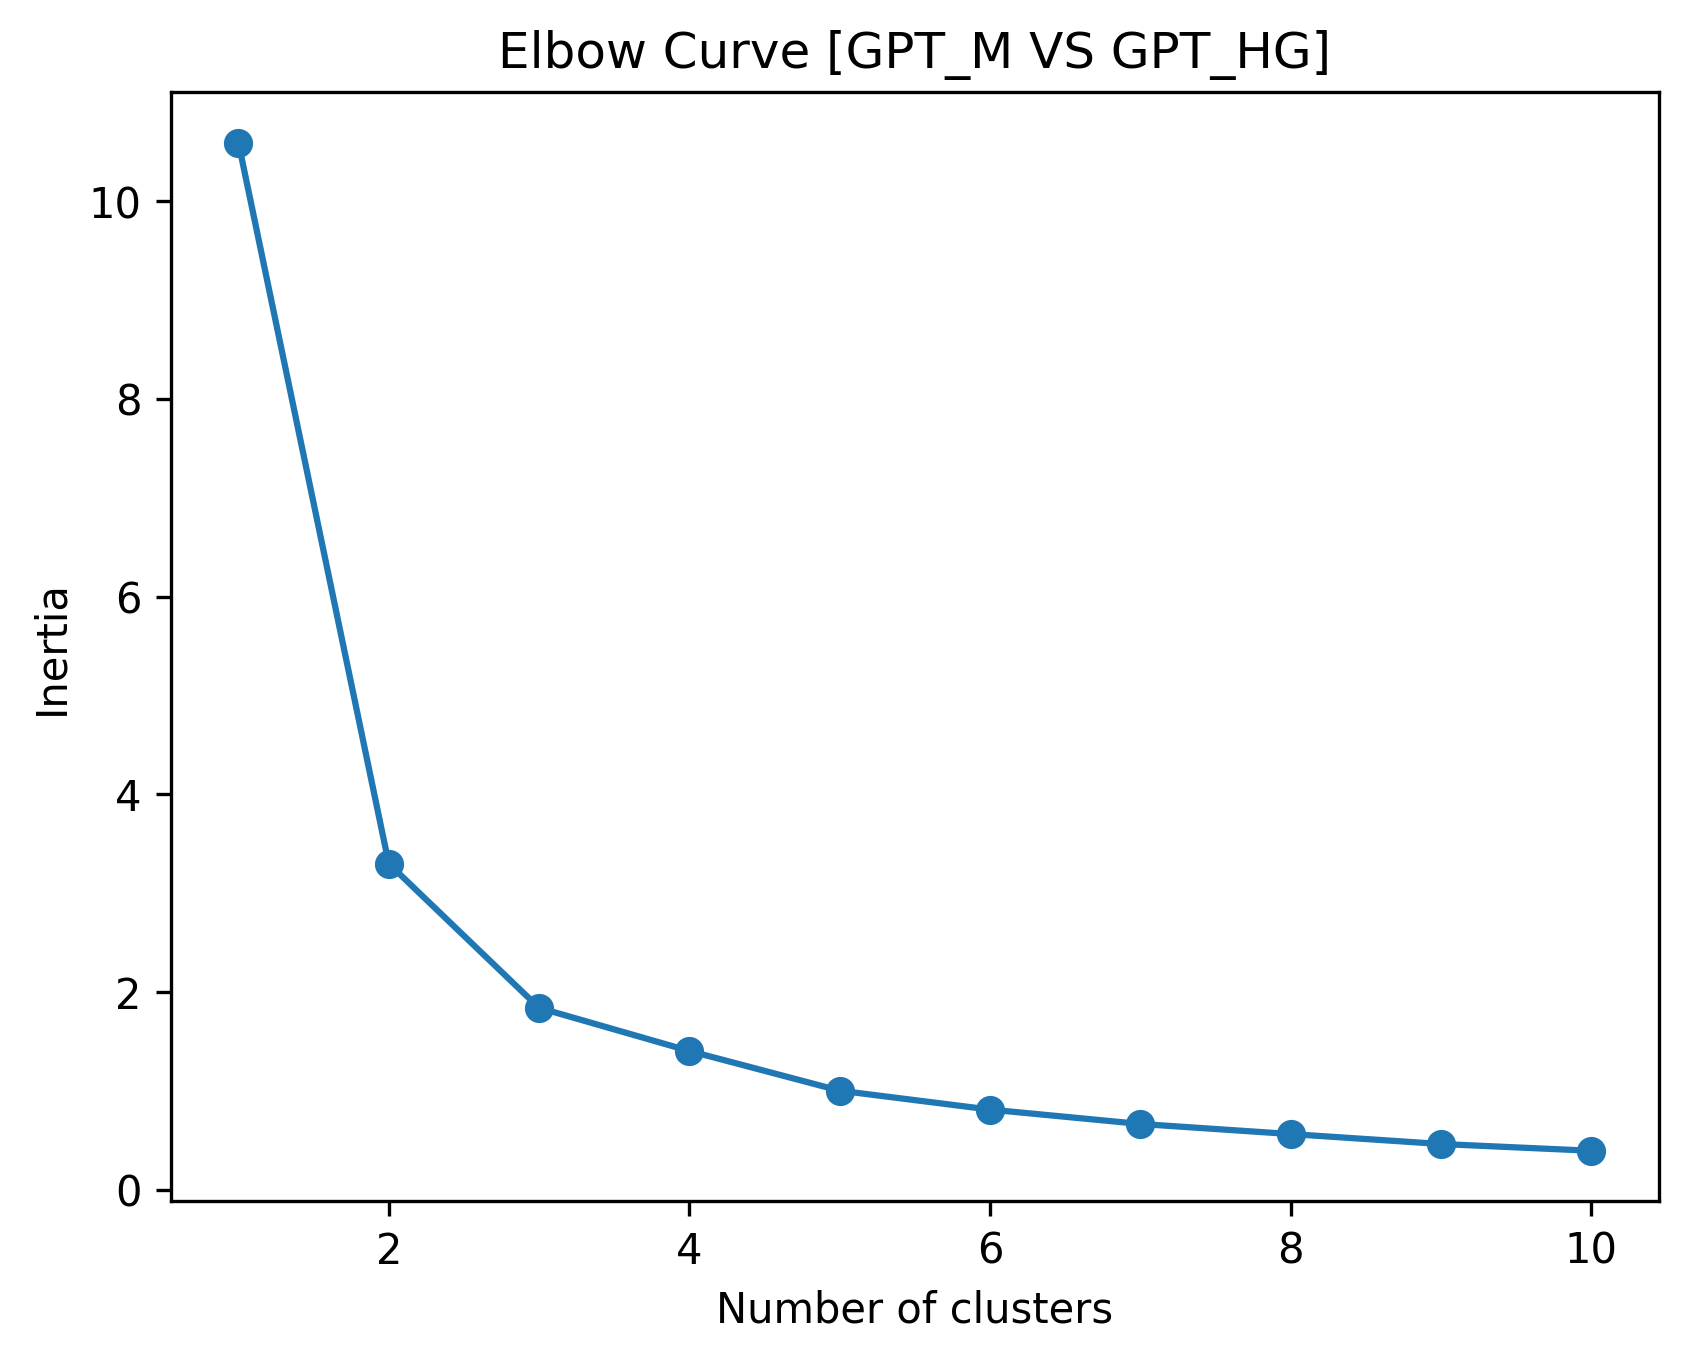

In [20]:
#Array for variation within each cluster
inertias = []

#We will calculate the variation for 10 clusters
for i in range(1,11): 
    kmeans = KMeans(n_clusters=i, n_init = 10)
    kmeans.fit(clust_data_2)
    inertias.append(kmeans.inertia_)

#plotting elbow curve    
plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow Curve [GPT_M VS GPT_HG]')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

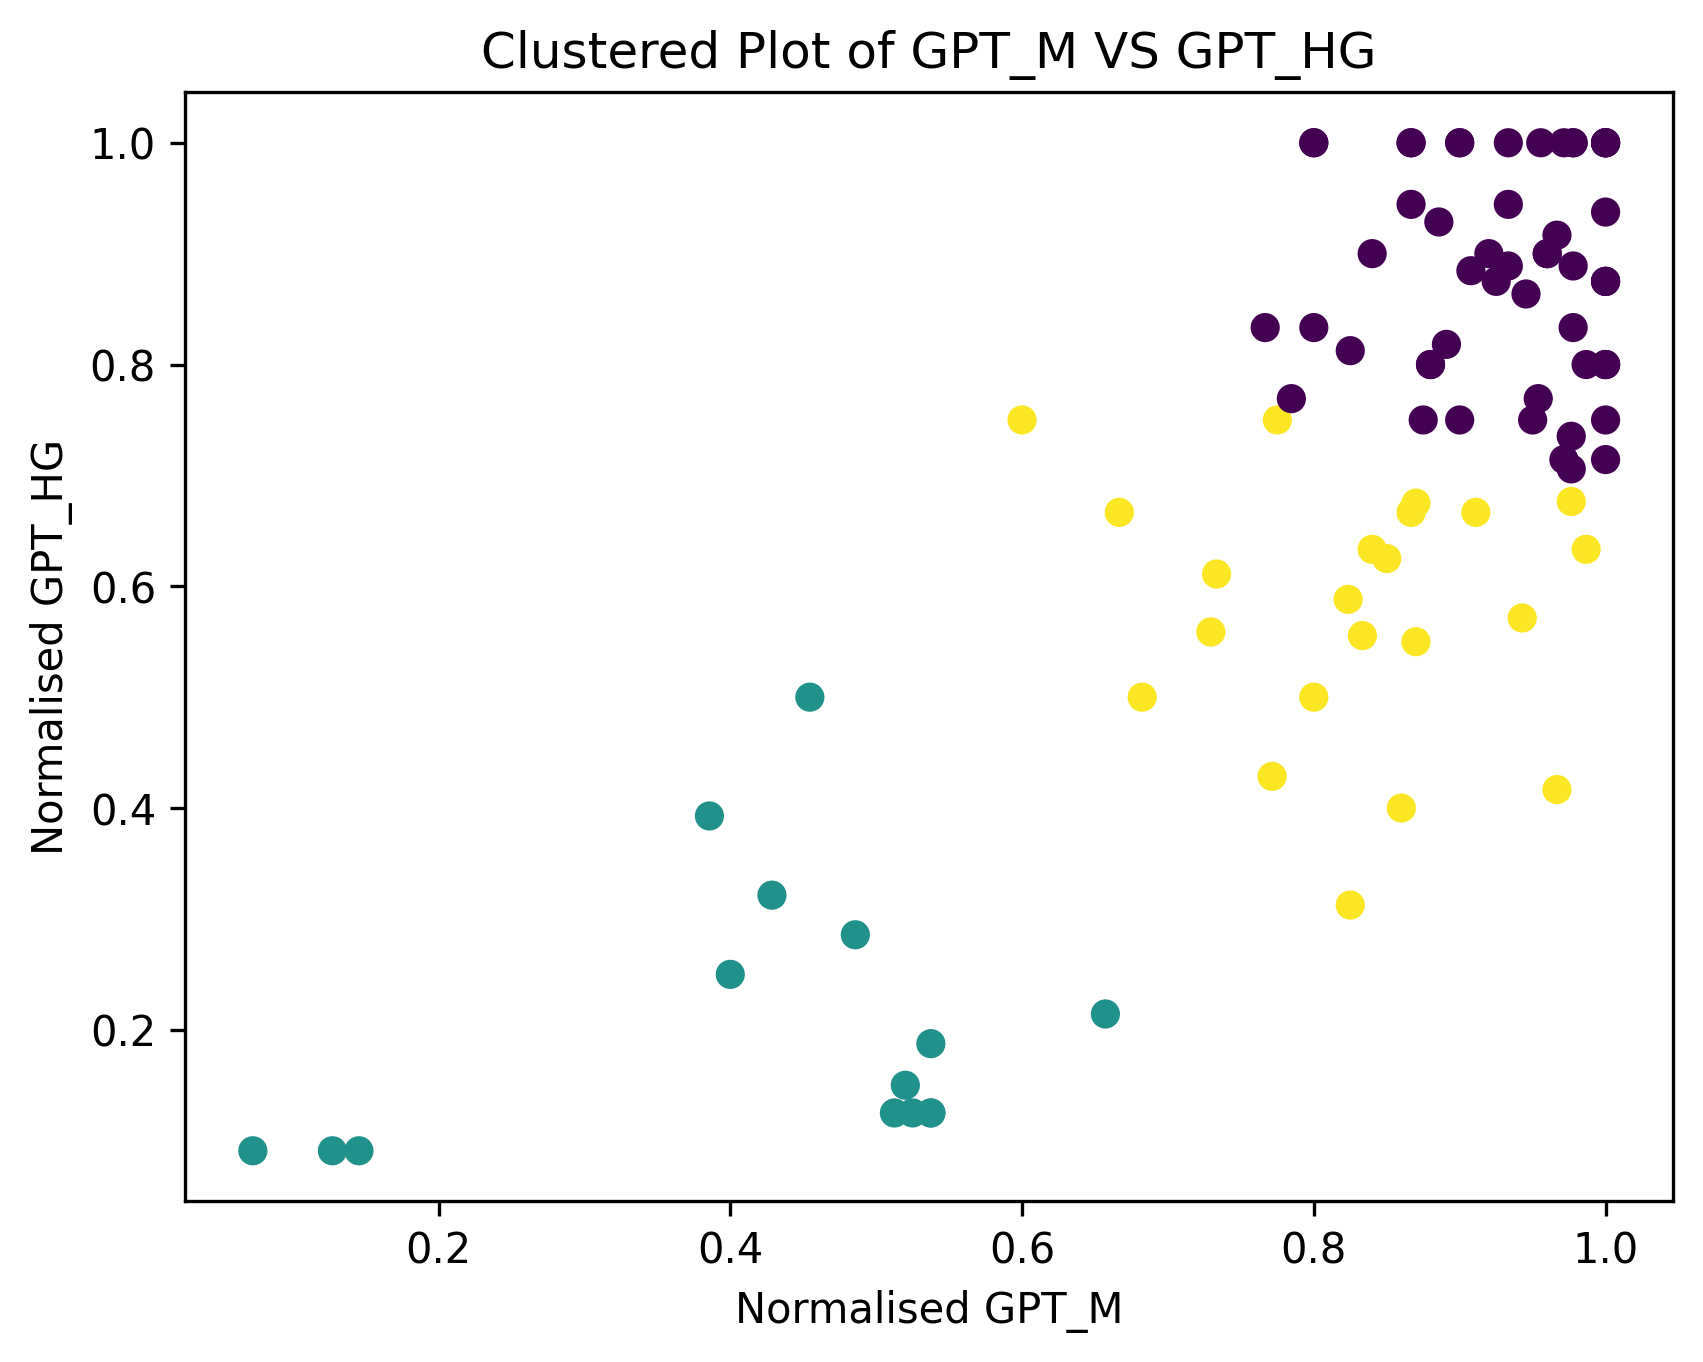

In [21]:
#Creating the classified data. Play around with n_clusters if you would like to see how data is classfied differently.
kmeans = KMeans(n_clusters=3, n_init = 10)
kmeans.fit(clust_data_2)

#Plotting classified data
plt.scatter(concat_MS['Norm'], concat_HG['Norm'], c=kmeans.labels_)
plt.xlabel("Normalised GPT_M")
plt.ylabel("Normalised GPT_HG")
plt.title("Clustered Plot of GPT_M VS GPT_HG")
plt.show()

# Clustering No Markscheme vs Human Grading

In [22]:
clust_data_3 = list(zip(concat_NMS['Norm'], concat_HG['Norm']))

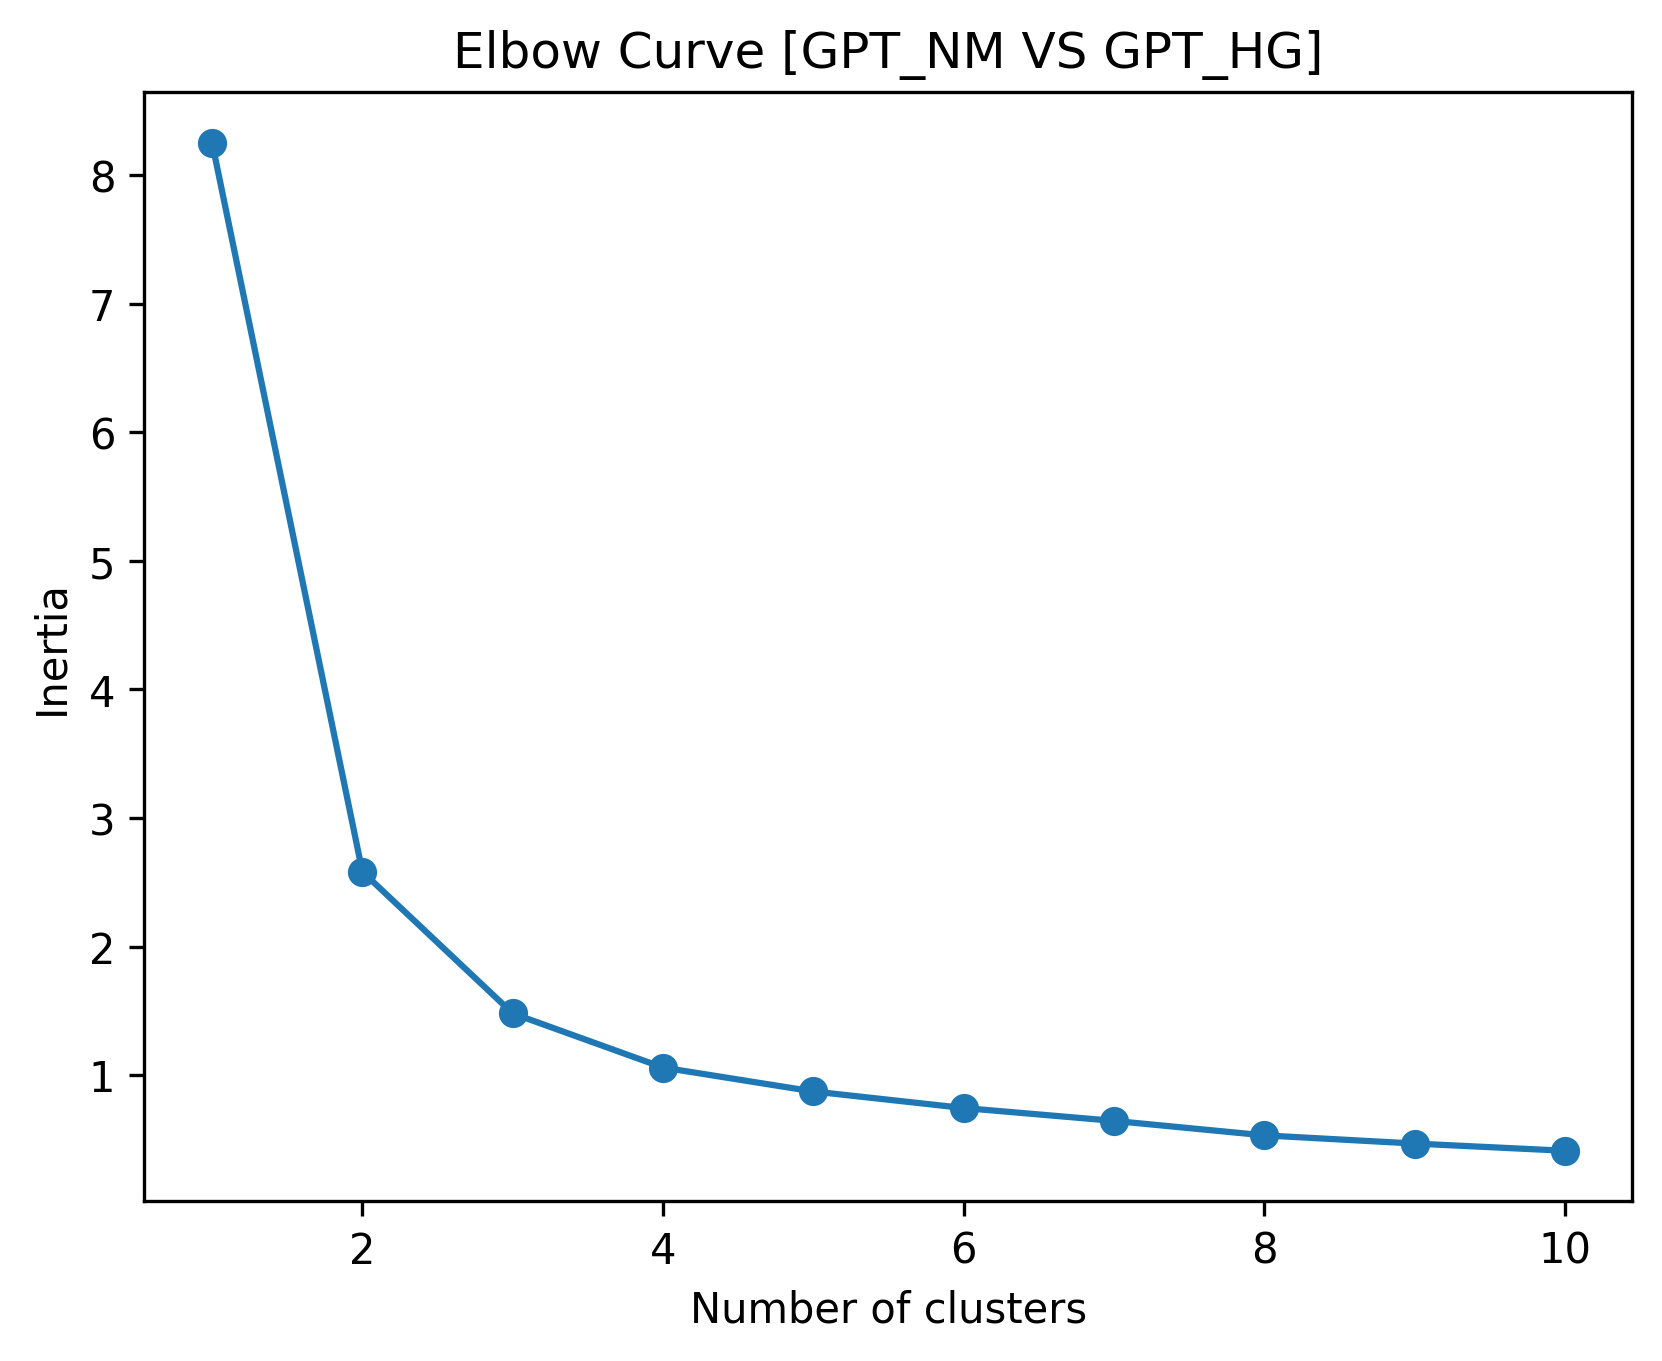

In [23]:
#Array for variation within each cluster
inertias = []

#We will calculate the variation for 10 clusters
for i in range(1,11): 
    kmeans = KMeans(n_clusters=i, n_init = 10)
    kmeans.fit(clust_data_3)
    inertias.append(kmeans.inertia_)

#plotting elbow curve    
plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow Curve [GPT_NM VS GPT_HG]')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

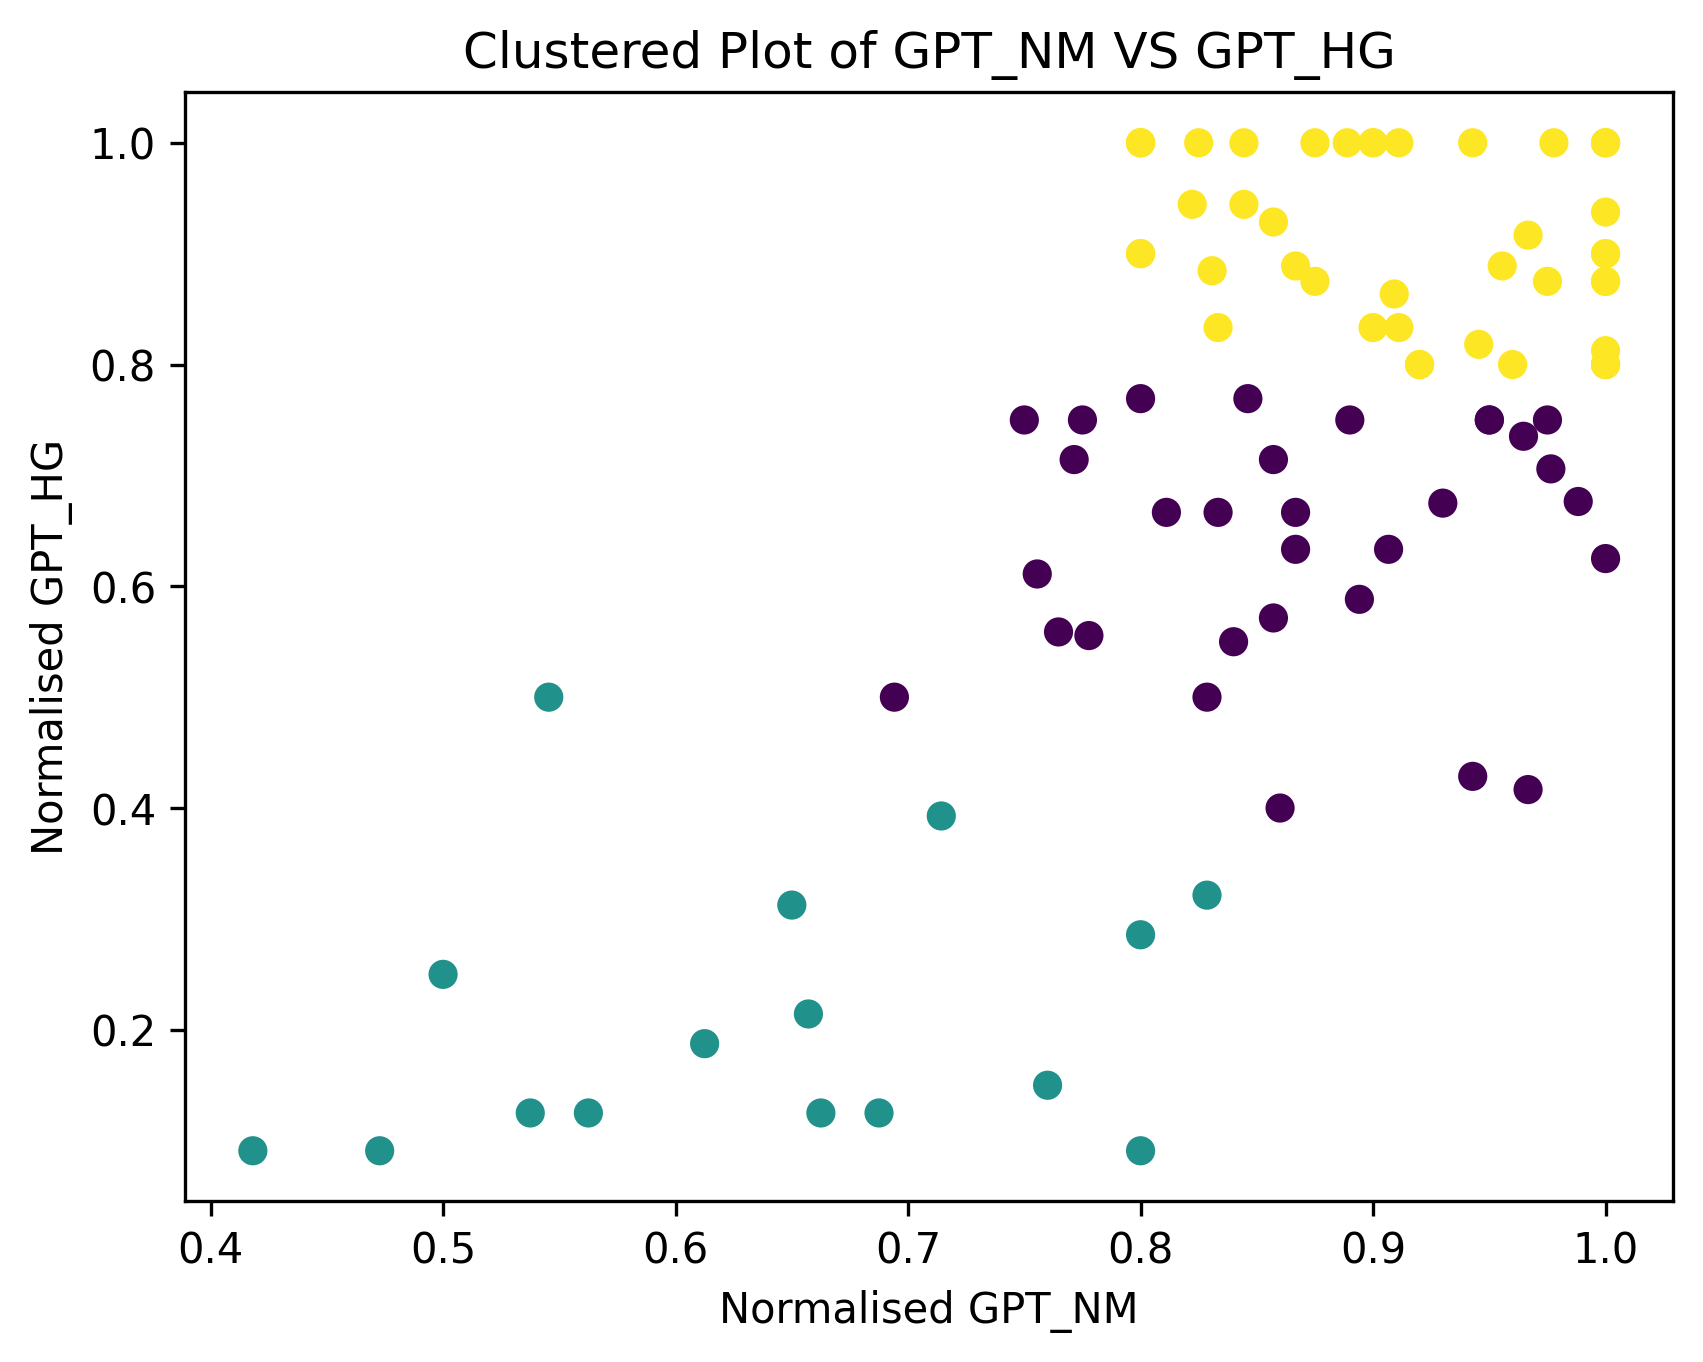

In [24]:
#Creating the classified data. Play around with n_clusters if you would like to see how data is classfied differently.
kmeans = KMeans(n_clusters=3, n_init = 10)
kmeans.fit(clust_data_3)

#Plotting classified data
plt.scatter(concat_NMS['Norm'], concat_HG['Norm'], c=kmeans.labels_)
plt.xlabel("Normalised GPT_NM")
plt.ylabel("Normalised GPT_HG")
plt.title("Clustered Plot of GPT_NM VS GPT_HG")
plt.show()

# Implementing t-SNE


In [25]:
red_data = pd.concat([concat_MS, concat_NMS, concat_HG], axis = 1) #creating data with only normalised grades
red_data = red_data.loc[:, ['Norm', 'Norm Std']]
red_data.columns = ['Norm_MS', 'Norm_NMS', 'Norm_HG', 'Norm_Std_MS', 'Norm_Std_NMS', 'Norm_Std_HG']
red_data['GPT_Human_diff'] = ((red_data['Norm_MS'] + red_data['Norm_NMS']) / 2) - red_data['Norm_HG']
red_data

,Norm_MS,Norm_NMS,Norm_HG,Norm_Std_MS,Norm_Std_NMS,Norm_Std_HG,GPT_Human_diff
0,0.825000,1.000000,0.812500,0.050000,0.000000,0.062500,0.100000
1,1.000000,1.000000,0.800000,0.000000,0.000000,0.000000,0.200000
2,0.385714,0.714286,0.392857,0.092029,0.022588,0.035714,0.157143
3,0.945455,0.909091,0.863636,0.022268,0.028748,0.045455,0.063636
4,0.072727,0.418182,0.090909,0.072727,0.036364,0.000000,0.154545
...,...,...,...,...,...,...,...
85,0.682353,0.694118,0.500000,0.035294,0.039019,0.029412,0.188235
86,1.000000,0.875000,0.875000,0.000000,0.039528,0.125000,0.062500
87,0.933333,0.822222,0.944444,0.044444,0.056656,0.055556,-0.066667
88,0.976471,0.976471,0.705882,0.023529,0.014409,0.000000,0.270588


In [26]:
#running t-SNE
tsne = TSNE(learning_rate = 500, n_components = 2)
x_tsne = tsne.fit_transform(red_data)
y = np.concatenate(np.stack((np.repeat(1,30), np.repeat(2,30), np.repeat(3,30)), axis = 0)) #creating a subject marker
pd.DataFrame(x_tsne)

,0,1
0,23.311707,60.918468
1,86.146393,-41.461472
2,-137.574295,-182.461990
3,99.402725,77.173950
4,251.742157,-1.827376
...,...,...
85,-104.596725,-133.404205
86,23.199963,161.092072
87,110.543320,171.639847
88,27.002815,-61.296963


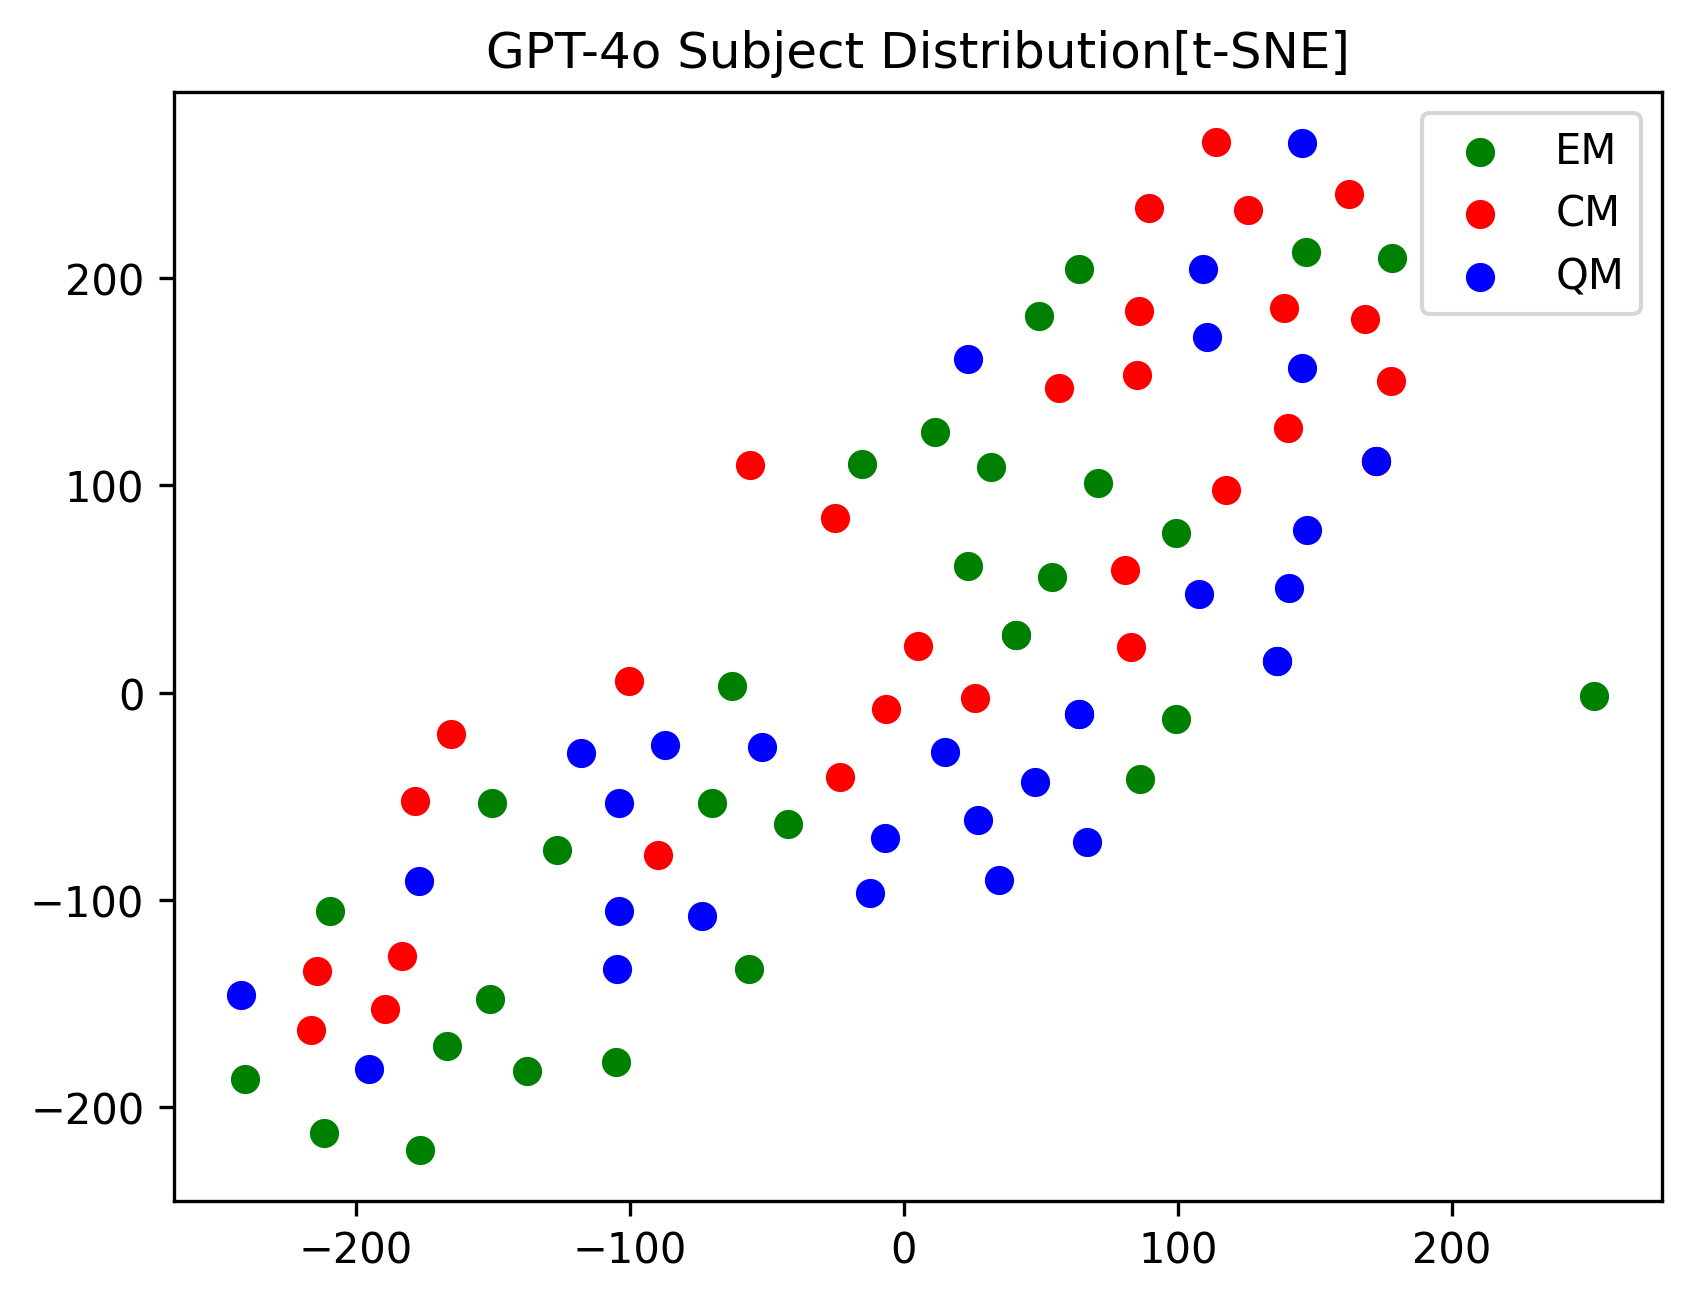

In [39]:
plt.figure()
plt.scatter(x_tsne[np.where(y==1),0], x_tsne[np.where(y==1), 1], color='g', label = "EM")
plt.scatter(x_tsne[np.where(y==2),0], x_tsne[np.where(y==2), 1], color='r', label = "CM")
plt.scatter(x_tsne[np.where(y==3),0], x_tsne[np.where(y==3), 1], color='b', label = "QM")
plt.title("GPT-4o Subject Distribution[t-SNE]")
plt.legend()

In [28]:
clust_data_4 = tuple(map(tuple, x_tsne))

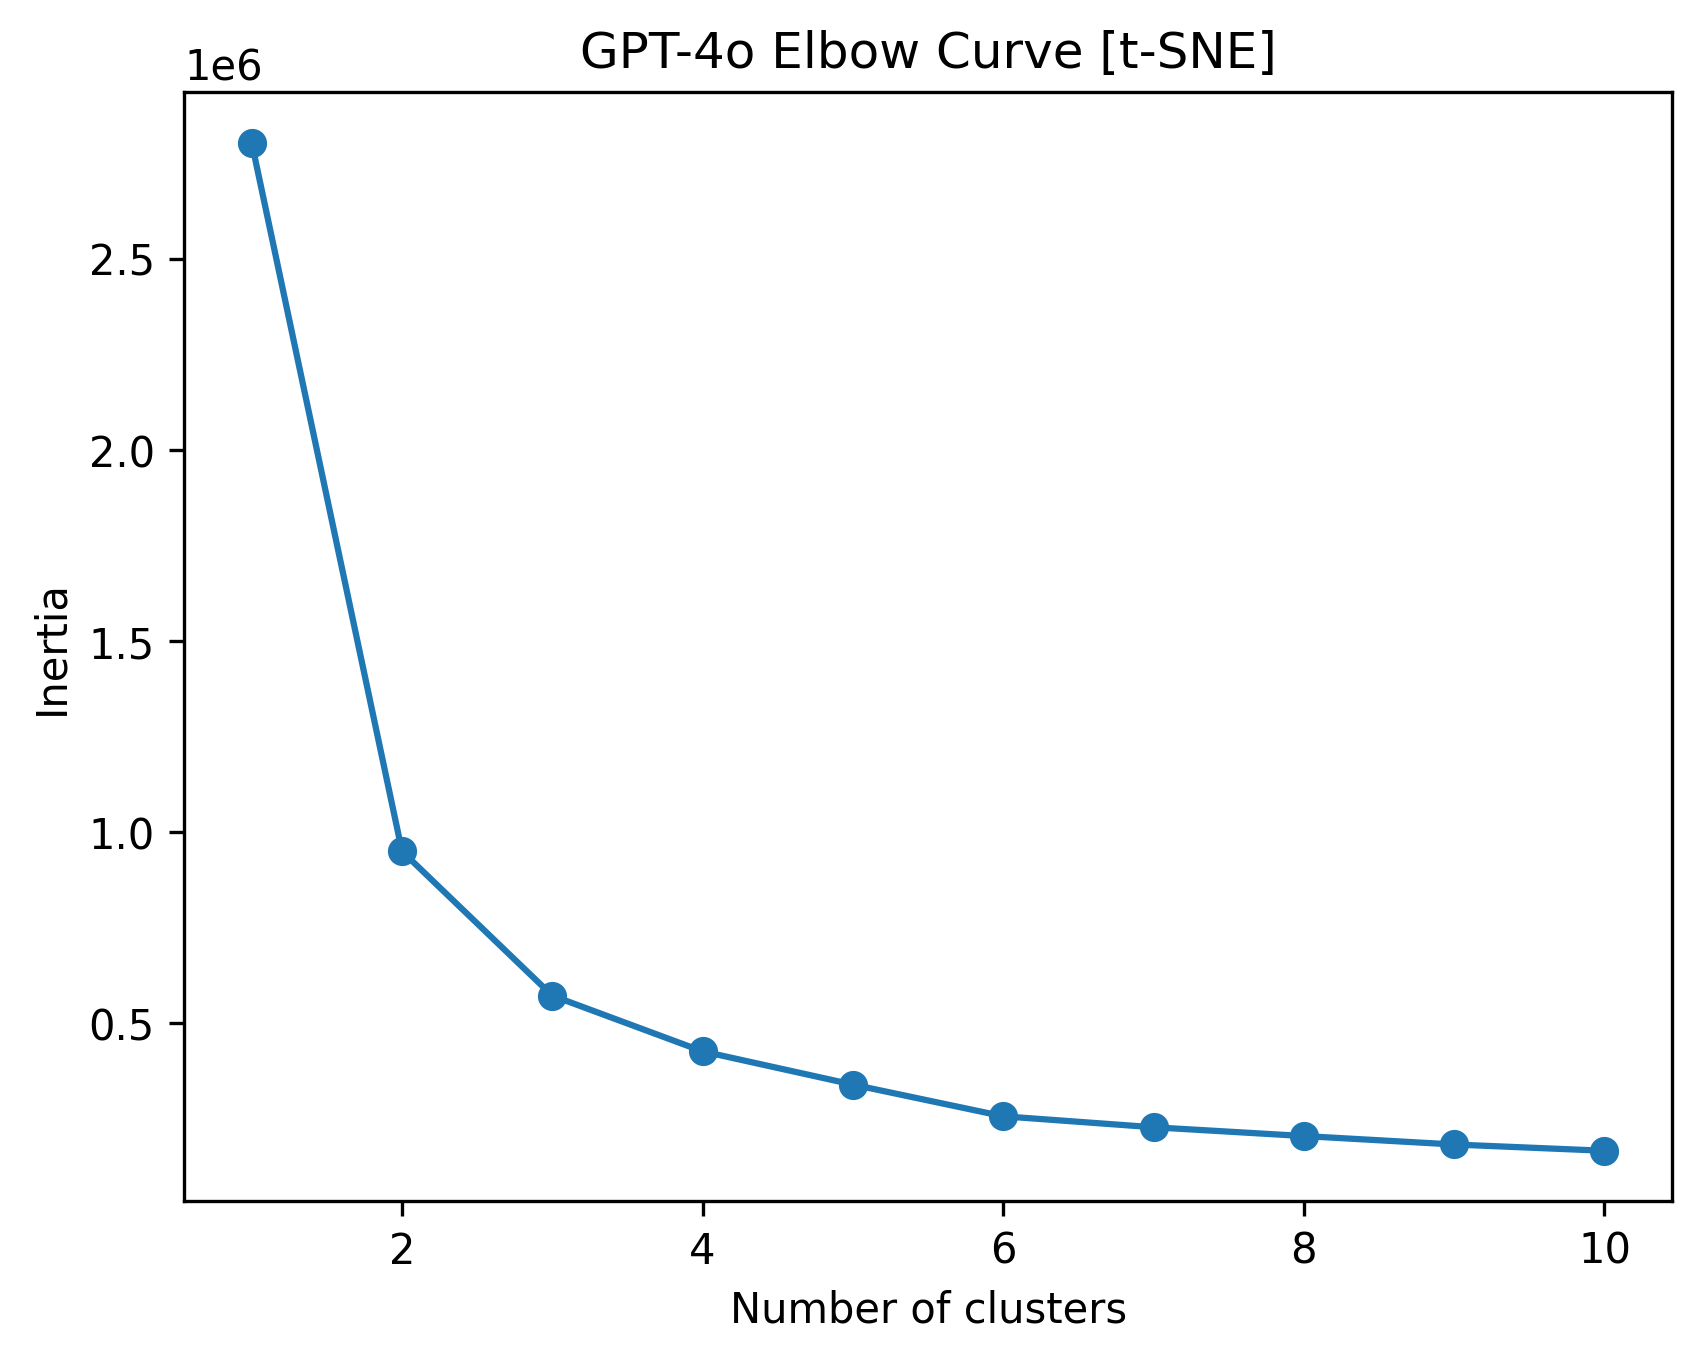

In [33]:
#Array for variation within each cluster
inertias = []

#We will calculate the variation for 10 clusters
for i in range(1,11): 
    kmeans = KMeans(n_clusters=i, n_init = 10)
    kmeans.fit(clust_data_4)
    inertias.append(kmeans.inertia_)

#plotting elbow curve    
plt.plot(range(1,11), inertias, marker='o')
plt.title('GPT-4o Elbow Curve [t-SNE]')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

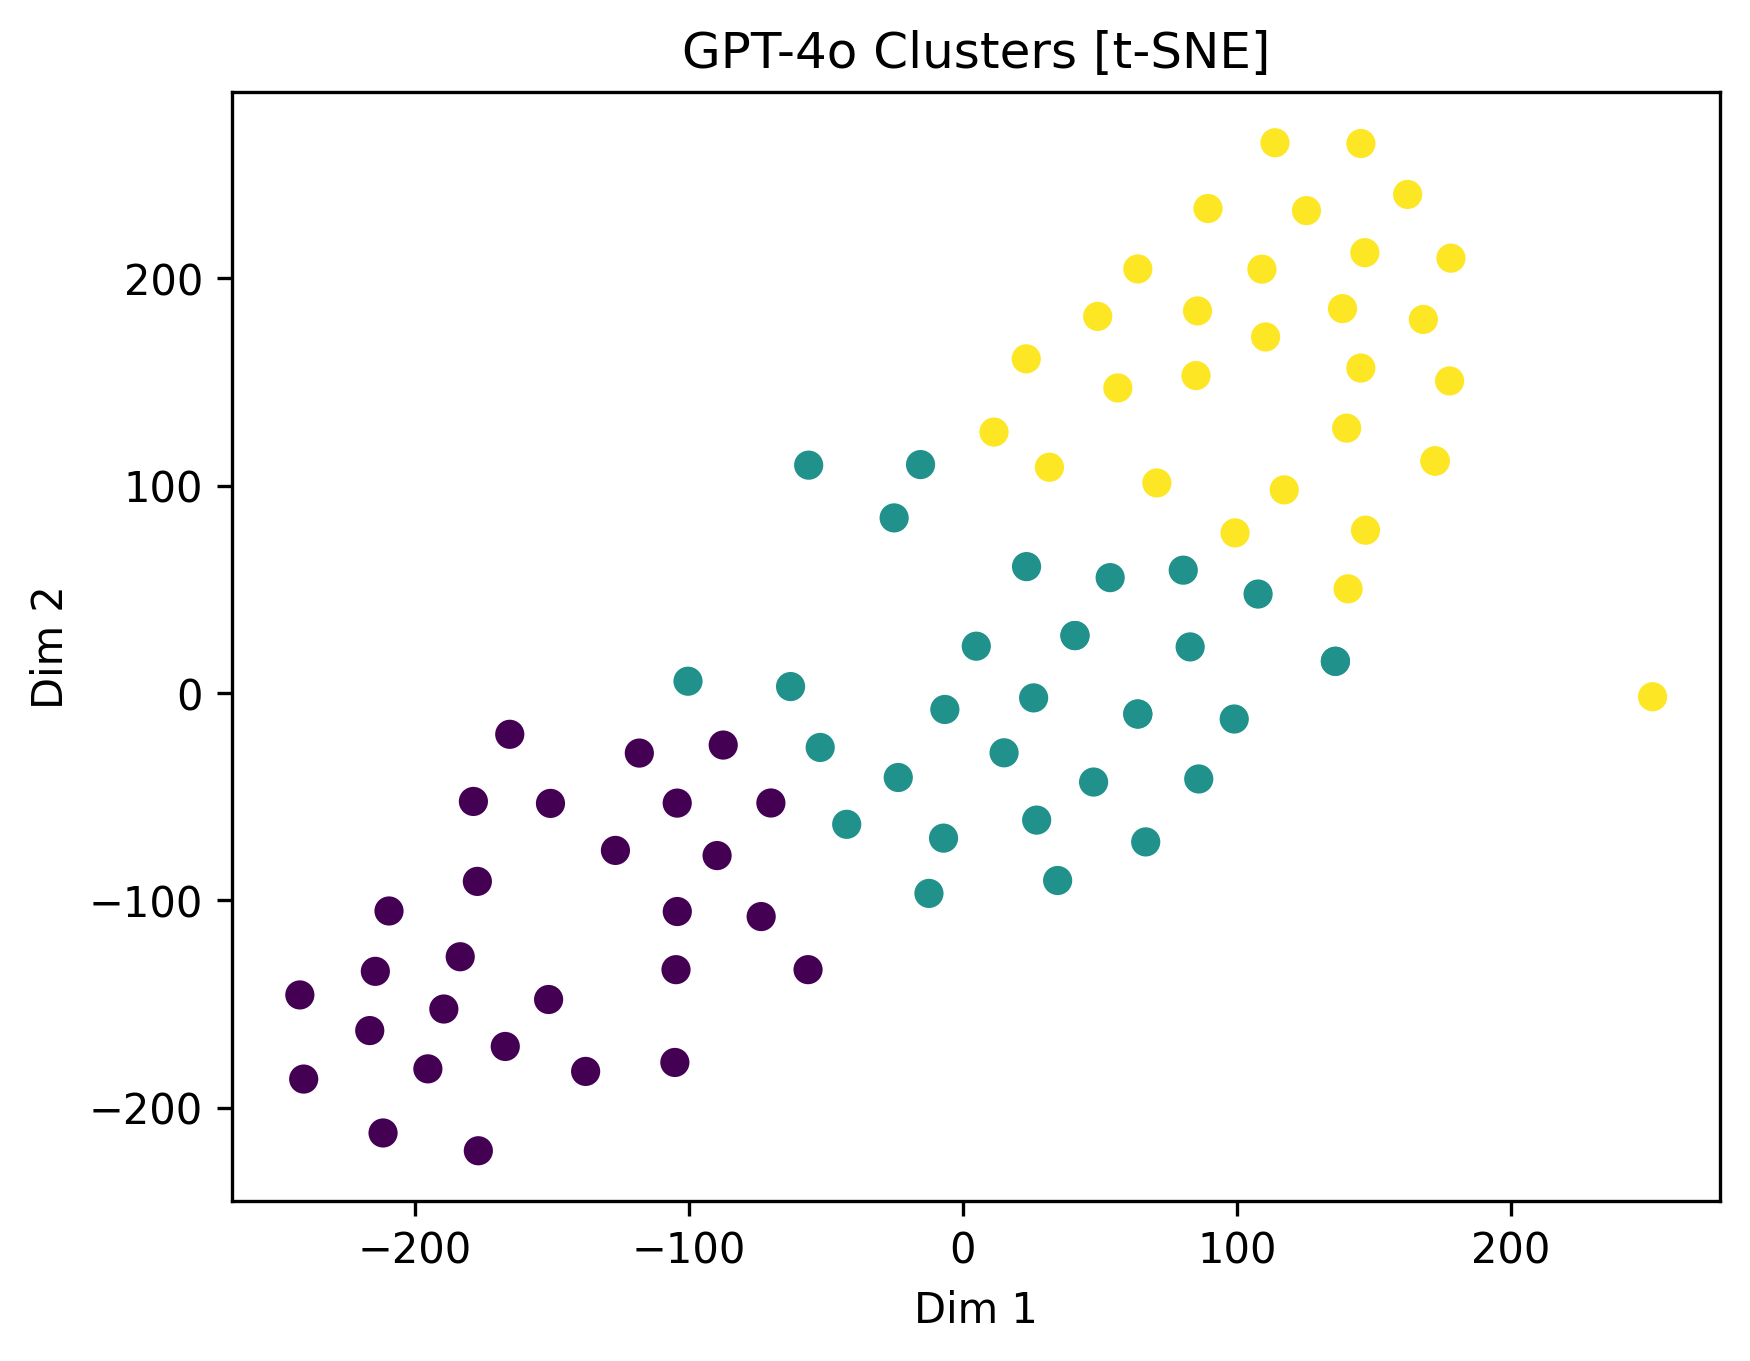

In [35]:
#Creating the classified data. Play around with n_clusters if you would like to see how data is classfied differently.
kmeans = KMeans(n_clusters=3, n_init = 10)
kmeans.fit(clust_data_4)

#Plotting classified data
plt.scatter(x_tsne[np.where(y>0),0], x_tsne[np.where(y>0), 1], c=kmeans.labels_)
plt.title('GPT-4o Clusters [t-SNE]')
plt.xlabel('Dim 1')
plt.ylabel('Dim 2')
plt.show()

In [31]:
# Create a DataFrame to organize the cluster assignments and the labels (CM, QM, EM)
cluster_data = pd.DataFrame({'Cluster': kmeans.labels_, 'Label': y})

# Use the 'groupby' function to count how many of each label are in each cluster
cluster_summary = cluster_data.groupby(['Cluster', 'Label']).size().unstack(fill_value=0)

# Display the summary
print(cluster_summary)

Label     1   2   3
Cluster            
0         9  14   8
1        11   7   8
2        10   9  14
